In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
X = np.array([1,1])
np.random.rand()

0.7635796808869544

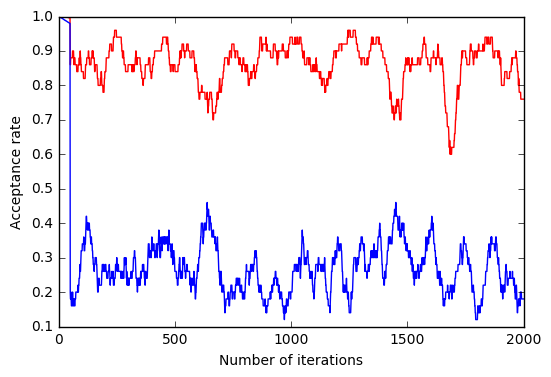

In [3]:
def log_target(x,a):
    tmp1 = (x[0]/a)**2
    tmp2 = x[1]**2
    return (-tmp1 - tmp2 - (1./4.)*(tmp1 - tmp2)**2)

def p1(x,sigma,a):
    """
    Updates the first component following a symetric random walk
    """
    proposal = np.array([x[0] + sigma*np.random.randn(),x[1]])
    alpha = np.exp(log_target(proposal,a)-log_target(x,a))
    u = np.random.rand()
    if(u <= alpha):
        return min(1,alpha),proposal,True
    else:
        return min(1,alpha),x,False
    

def p2(x,sigma,a):
    """
    Updates the second component following a symetric random walk
    """
    proposal = np.array([x[0],x[1]+ sigma*np.random.randn()])
    alpha = np.exp(log_target(proposal,a)-log_target(x,a))
    u = np.random.rand()
    if(u <= alpha):
        return min(1,alpha),proposal,1
    else:
        return min(1,alpha),x,0
    

def p(x,sigma1,sigma2,a):
    u = np.random.rand()
    alpha1,x1,accepted1 = p1(x,sigma1,a)
    alpha2,x2,accepted2 = p2(x,sigma2,a)
    alphas = np.array([alpha1,alpha2])
    accepted = np.array([accepted1,accepted2])
    if(u<0.5):
        return alphas,x1,accepted
    else:
        return alphas,x2,accepted

def GSMH(x0,sigma1,sigma2,a,Niter):
    chain = np.zeros((Niter,2))
    alphas = np.ones((Niter,2))
    chain[0] = x0
    accepted_x = np.ones(Niter)
    accepted_y = np.ones(Niter)
    rate_x = np.zeros(Niter)
    rate_y = np.zeros(Niter)
    for i in range(1,Niter):
        alpha12, new_x,accepted = p(chain[i-1],sigma1,sigma2,a)
        chain[i] = new_x
        alphas[i] = alpha12
        accepted_x[i] = accepted[0]
        accepted_y[i] = accepted[1]
        if(i<50):
            rate_x[i] = np.mean(accepted_x)
            rate_y[i] = np.mean(accepted_y)
        else:
            rate_x[i] = np.mean(accepted_x[i-50:i])
            rate_y[i] = np.mean(accepted_y[i-50:i])

    return alphas,chain, rate_x,rate_y

x0 = np.random.rand(2)
sigma1 = 3
sigma2 = 3
a = 10
Niter = 2000
alphas,chain, rate_x,rate_y = GSMH(x0,sigma1,sigma2,a,Niter)

plt.plot(range(1,Niter),rate_x[1:Niter],'r')
plt.plot(range(1,Niter),rate_y[1:Niter])
plt.xlabel('Number of iterations')
plt.ylabel('Acceptance rate')
plt.show()

On voit que les taux d'accpetations restent assez bas selon le nombre d'itérations, et que l'acceptation pour x est nettement plus élevé que pour y.
On peut améliorer cette méthode en adaptant les variances à chaque itération.


In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

from matplotlib.animation import FuncAnimation

def update(n):
    x = chain[n]
    ax1.scatter(x[0],x[1])
animation = FuncAnimation(fig,update,interval = 10)
plt.show()

In [52]:
animation = FuncAnimation(fig,update,interval = 10)

In [53]:
plt.show()